In [29]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [10]:
data = pd.read_csv("C:/Users/USER/Desktop/Program/Machine_training/Network_processed_data.csv")
for i in range (10):
    data = shuffle(data)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
data.head(10)

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,...,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type_backdoor,type_ddos,type_dos,type_injection,type_mitm,type_normal,type_password,type_ransomware,type_scanning,type_xss
333435,88764,4593,27284,1516,51,2,1,18540,33,442,10,0,1,26,1,441,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
389726,102022,4614,31698,1520,2409,2,0,0,0,0,6,0,1,390,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
332064,88623,4595,22167,2254,51,2,1,70139,44,355,10,0,1,37,1,354,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
233308,78208,4595,3999,2793,51,2,1,10651,49,118,10,0,1,42,1,117,1,1,4,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
454865,114142,4598,38125,1525,78,1,0,132,0,0,1,0,1,7,1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True,False,False,False,False,False,False,False,False,False
404186,107466,4600,39436,1508,1044,1,1,13913,218,2409,10,0,7,468,9,3184,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
221199,76296,4602,38949,1508,51,2,1,30,48,35,10,0,1,41,1,34,1,1,1,3,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,True,False,False,False,False,False,False,False,False
211286,76260,4602,31942,1514,140,1,0,117545,0,1,7,1,3,120,1,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,True,False,False,False,False,False,False,False,False
140767,69157,1441,30409,260,780,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
309533,85752,4602,39577,1276,19,1,1,102233,78,196,10,0,18,966,12,775,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,True,False,False,False


In [11]:
#拿出資料90%當作訓練集
par = np.random.rand(len(data)) < 0.9
data_train = data[par]
#剩下的當作test集
data_test = data[~par]
train_data = data.values
test_data = data.values

#前44列的資料進行訓練
X_train = train_data[:,0:44]
X_train =X_train.astype(float)
#第5列之後為目標變量
Y_train = train_data[:,44:]
Y_train =Y_train.astype(float)
#前4列為測試集
X_test = test_data[:,0:44]

#第5列之後為訓練目標變量
Y_test = test_data[:,44:]
Y_test =Y_test.astype(float)


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("=============")
print(X_train.dtype)
print(Y_test.dtype)

(461043, 44)
(461043, 10)
(461043, 44)
(461043, 10)
float64
float64


In [15]:
# 建立 KNN 模型
knnModel = KNeighborsClassifier(n_neighbors=3)
# 使用訓練資料訓練模型
knnModel.fit(X_train,Y_train)
# 使用訓練資料預測分類
predicted = knnModel.predict(X_train)


In [31]:
# 預測成功的比例
print('accuracy: ',knnModel.score(X_test,predicted))

accuracy:  1.0


In [14]:
knn_model = KNeighborsClassifier(n_neighbors = 10, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
accuracy = cross_val_score(knn_model, X_test, Y_test, cv=10, scoring="accuracy")
print(accuracy)
print(accuracy.mean()*100,'%')

[0.98670426 0.98817916 0.98737664 0.98735468 0.98681242 0.98657383
 0.98542426 0.9873113  0.98679073 0.98572792]
98.68255199981378 %


In [17]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(Y_test, predicted)


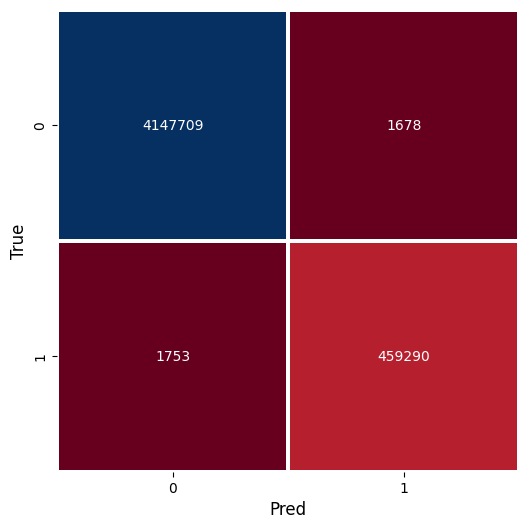

In [28]:

# 計算總體的混淆矩陣
total_cm = np.sum(cm, axis=0)
# 繪製熱力圖
plt.figure(figsize=(8, 6))
sns.heatmap(total_cm, square=True, annot=True, fmt='d', linecolor='white', cmap='RdBu', linewidths=1.5, cbar=False)
plt.xlabel('Pred', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.show()
